<a href="https://colab.research.google.com/github/AbinVarghexe/AI_model_traning/blob/main/TipModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tip Model

In [119]:
# install libraries
!pip install tensorflow pandas matplotlib seaborn


In [120]:
#import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
tips = sns.load_dataset("tips")

In [122]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [123]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [124]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [125]:
tips_converted = pd.get_dummies(tips)
tips_converted.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True


In [126]:
tips_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   244 non-null    float64
 1   tip          244 non-null    float64
 2   size         244 non-null    int64  
 3   sex_Male     244 non-null    bool   
 4   sex_Female   244 non-null    bool   
 5   smoker_Yes   244 non-null    bool   
 6   smoker_No    244 non-null    bool   
 7   day_Thur     244 non-null    bool   
 8   day_Fri      244 non-null    bool   
 9   day_Sat      244 non-null    bool   
 10  day_Sun      244 non-null    bool   
 11  time_Lunch   244 non-null    bool   
 12  time_Dinner  244 non-null    bool   
dtypes: bool(10), float64(2), int64(1)
memory usage: 8.2 KB


In [127]:
x=tips_converted.drop("tip",axis=1)
y=tips_converted["tip"]

In [128]:
x.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,False,True,False,True,False,False,False,True,False,True
1,10.34,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3,True,False,False,True,False,False,False,True,False,True
3,23.68,2,True,False,False,True,False,False,False,True,False,True
4,24.59,4,False,True,False,True,False,False,False,True,False,True


In [129]:
y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

# Model 1 SDG

In [131]:
tf.random.set_seed(32)


tips_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

tips_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

history = tips_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.7758 - mae: 5.7758  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0311 - mae: 4.0311 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1767 - mae: 3.1767 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7958 - mae: 2.7958  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0613 - mae: 2.0613 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.6077 - mae: 1.6077
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0546 - mae: 2.0546  
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7972 - mae: 1.7972 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3387 - mae: 1.3387
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0051 - mae: 1.0051 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0710 - mae: 1.0710 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9705 - mae: 0.9705  
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

In [132]:
tips_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143 (576.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [133]:
tips_model_loss,tips_model_mae = tips_model.evaluate(x_test,y_test)
tips_model_loss,tips_model_mae

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8412 - mae: 0.8412 


(0.8802424669265747, 0.8802424669265747)

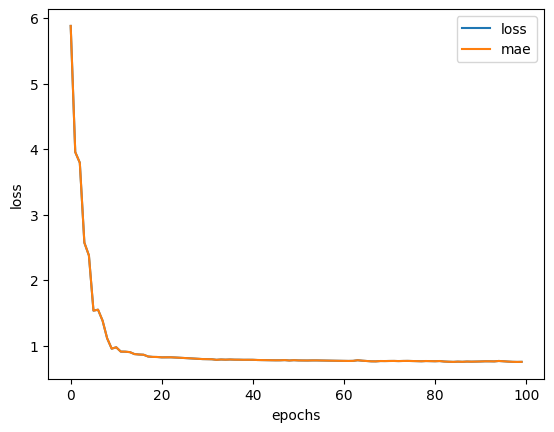

In [134]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

# Model 2 with Adam

In [135]:
tf.random.set_seed(32)


tips_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

tips_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

history_2 = tips_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [136]:
tips_model_2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,323 (9.08 KB)

 Trainable params: 2,321 (9.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [137]:
tips_model_2_loss,tips_model_2_mae = tips_model_2.evaluate(x_test,y_test)
tips_model_2_loss,tips_model_2_mae

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.8457 - mae: 0.8457


(0.87894207239151, 0.87894207239151)

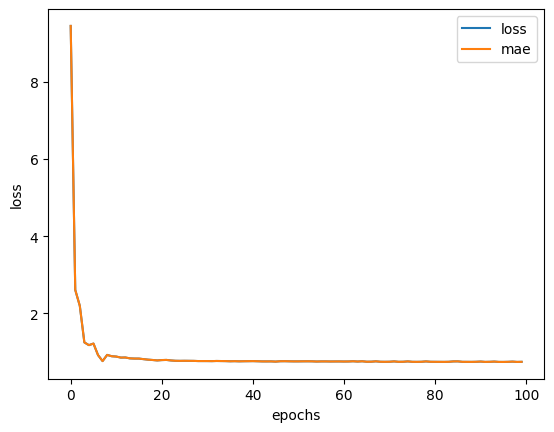

In [138]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

# Model 3 with 200 epochs and Adam

In [139]:
tf.random.set_seed(32)


tips_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

tips_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

history_3 = tips_model_3.fit(x_train, y_train, epochs=200, verbose=0)

In [140]:
tips_model_3_loss,tips_model_3_mae = tips_model_3.evaluate(x_test,y_test)
tips_model_3_loss,tips_model_3_mae

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8363 - mae: 0.8363 


(0.8679255247116089, 0.8679255247116089)

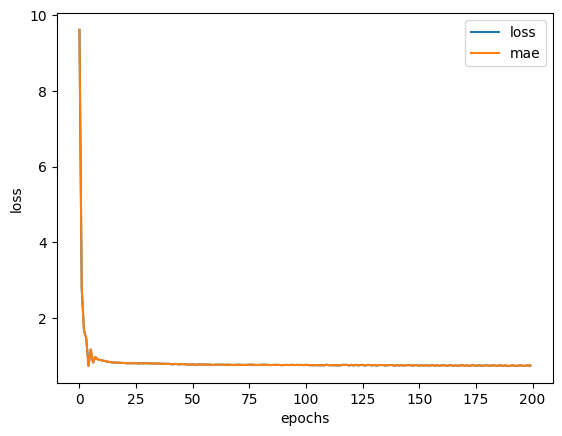

In [141]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

# Model 4 Preprocessing data (normalization and standardization)

In [142]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [143]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [144]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


ct = make_column_transformer(
    (MinMaxScaler(), ["total_bill", "size"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "time", "day"])
)


X = tips.drop("tip", axis=1)
y = tips["tip"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


ct.fit(X_train)


x_train_normal = ct.transform(X_train)
x_test_normal = ct.transform(X_test)

In [145]:
X_train.loc[0]

,0
total_bill,16.99
sex,Female
smoker,No
day,Sun
time,Dinner
size,2


In [146]:
x_train_normal[0]

array([0.19669041, 0.2       , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        ])

In [147]:
x_train_normal.shape, x_train.shape

((195, 12), (195, 12))

In [148]:
tf.random.set_seed(32)


tips_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

tips_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])
history_4 = tips_model_4.fit(x_train_normal, y_train, epochs=200, verbose=0)

In [149]:
tips_model_4_loss,tips_model_4_mae = tips_model_4.evaluate(x_test,y_test)
tips_model_4_loss,tips_model_4_mae

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 88.3083 - mae: 88.3083 


(87.25927734375, 87.25927734375)

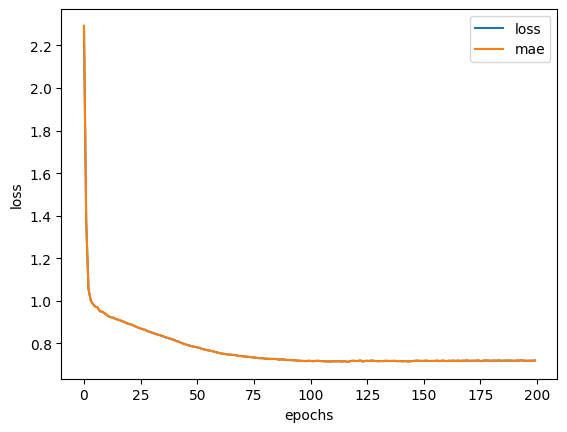

In [150]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [151]:
model_comapare = pd.DataFrame(data=[tips_model_mae, tips_model_2_mae, tips_model_3_mae, tips_model_4_mae],
                              columns=['Model MAE'])
model_comapare

,Model MAE
0,0.880242
1,0.878942
2,0.867926
3,87.259277


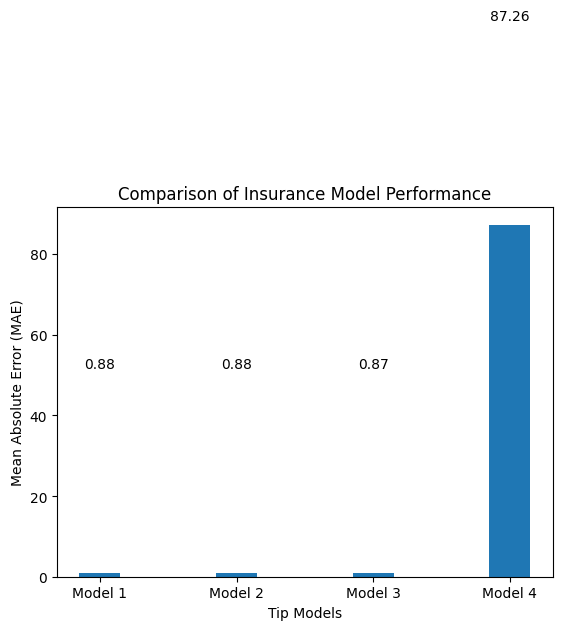

In [152]:
#VISUALIZE THE PERFORMANCE

models = ['Model 1', 'Model 2', 'Model 3','Model 4']
mae_values = [tips_model_mae, tips_model_2_mae, tips_model_3_mae, tips_model_4_mae]

# Create the bar plot
plt.bar(models, mae_values,width = 0.3)

plt.xlabel('Tip Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Insurance Model Performance')

for i, v in enumerate(mae_values):
    plt.text(i, v + 50, str(round(v, 2)), ha='center', va='bottom')

# Display the plot
plt.show()